### import os for  operating system operations e.g., creating a folder

In [2]:
import os

### Tensorflow and keras are two packages for creating neural network models.

In [3]:

import tensorflow as tf
from tensorflow import keras

### For splitting our dataset into training and test set

In [4]:

from sklearn.model_selection import train_test_split

### print tensorflow (TF) version. Make sure you have at least tensorflow 2.1.0

In [5]:

print(f"Tensorflow version: {tf.version.VERSION}")

Tensorflow version: 2.6.0


In [6]:
import pathlib # for processing a path e.g c:\documents\files\testset.csv
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data frame for the data.
import seaborn as sns # plotting.

### Read dataset

In [7]:

dataset = pd.read_csv('dataset2.csv')

### display dataset

In [8]:
true_values = dataset['WIND-DIRECTION']
dataset.head(-10)

,DATE,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,Jan-95,33.3,16.4,73,2.0,NaN,27,1014.5
1,Feb-95,35.9,18.6,123,3.0,NaN,23,1013.7
2,Mar-95,40.5,25.0,191,3.0,NaN,32,1009.1
3,Apr-95,40.1,27.2,196,4.0,NaN,43,1010.5
4,May-95,36.8,25.7,155,3.0,NaN,61,1010.3
...,...,...,...,...,...,...,...,...
303,NaN,40.7,29.4,270,1.5,47.4,48,1003.3
304,NaN,37.7,27.2,240,2.1,52.8,61,1005.7
305,NaN,33.8,25.4,230,1.9,52.1,72,1008.3
306,NaN,31.5,24.2,220,1.9,46.4,79,1010.0


### dataset characteristics

In [9]:

dataset.describe()

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
count,318.000000,318.000000,318.000000,318.000000,66.000000,318.000000,318.000000
mean,35.168868,23.039937,165.679245,3.449686,48.207576,53.556604,1011.990566
std,3.219431,3.183020,54.287681,1.456645,16.390328,21.502584,3.587883
min,28.500000,13.900000,58.000000,0.000000,18.900000,11.000000,1002.300000
25%,32.200000,21.000000,120.000000,2.225000,33.300000,32.000000,1010.400000
50%,35.000000,23.600000,163.500000,3.000000,47.600000,54.000000,1013.200000
75%,37.300000,25.000000,204.750000,4.000000,61.350000,75.000000,1014.300000
max,41.900000,29.400000,307.000000,12.000000,98.300000,85.000000,1036.000000


### Check for null and NaN values

In [10]:

dataset.isna().sum()

DATE                   113
MAXIMUM-TEMPERATURE      0
MINIMUM-TEMPERATURE      0
WIND-DIRECTION           0
WIND-SPEED               0
WIND-RUN               252
RELATIVE-HUMIDITY        0
AIR-PRESSURE             0
dtype: int64

In [11]:
median =dataset['WIND-RUN'].median()
median
dataset["WIND-RUN"].fillna(median, inplace=True)

### copy dataset

In [12]:
dataset.head(-10)

,DATE,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,Jan-95,33.3,16.4,73,2.0,47.6,27,1014.5
1,Feb-95,35.9,18.6,123,3.0,47.6,23,1013.7
2,Mar-95,40.5,25.0,191,3.0,47.6,32,1009.1
3,Apr-95,40.1,27.2,196,4.0,47.6,43,1010.5
4,May-95,36.8,25.7,155,3.0,47.6,61,1010.3
...,...,...,...,...,...,...,...,...
303,NaN,40.7,29.4,270,1.5,47.4,48,1003.3
304,NaN,37.7,27.2,240,2.1,52.8,61,1005.7
305,NaN,33.8,25.4,230,1.9,52.1,72,1008.3
306,NaN,31.5,24.2,220,1.9,46.4,79,1010.0


In [13]:

df = dataset[:]

### remove the date column

In [14]:

del df['DATE']

In [15]:
df

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,33.3,16.4,73,2.0,47.6,27,1014.5
1,35.9,18.6,123,3.0,47.6,23,1013.7
2,40.5,25.0,191,3.0,47.6,32,1009.1
3,40.1,27.2,196,4.0,47.6,43,1010.5
4,36.8,25.7,155,3.0,47.6,61,1010.3
...,...,...,...,...,...,...,...
313,36.0,22.4,170,3.4,63.7,26,1006.9
314,39.7,26.1,220,2.1,73.7,35,1005.6
315,39.7,28.8,200,4.6,84.2,65,1002.6
316,35.6,25.3,130,2.6,98.3,75,1005.4


In [16]:
print(f'Number of rows/example and columns in the dataset: {df.shape}')

Number of rows/example and columns in the dataset: (318, 7)


### Summary of information on the dataset.

In [17]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MAXIMUM-TEMPERATURE  318 non-null    float64
 1   MINIMUM-TEMPERATURE  318 non-null    float64
 2   WIND-DIRECTION       318 non-null    int64  
 3   WIND-SPEED           318 non-null    float64
 4   WIND-RUN             318 non-null    float64
 5   RELATIVE-HUMIDITY    318 non-null    int64  
 6   AIR-PRESSURE         318 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 17.5 KB


### Split the data into train/test splits

#### Split the data into 60% train and 40% test (later will divide the test to test and validate)

In [18]:

train_dataset, temp_test_dataset = train_test_split(df, test_size=0.4)

print( train_dataset.shape)
print( temp_test_dataset.shape)

(190, 7)
(128, 7)


### Split the test_dataset dataframe to 50% test and 50% validation.

In [19]:

test_dataset, valid_dataset = train_test_split(temp_test_dataset, test_size=0.5)
print(test_dataset.shape)
print(valid_dataset.shape)

(64, 7)
(64, 7)


In [20]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f"Train dataset      : {train_dataset.shape}")
print(f"Test dataset       : {test_dataset.shape}")
print(f"Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
Train dataset      : (190, 7)
Test dataset       : (64, 7)
Validation dataset : (64, 7)


## Plot the relationship between each two variables to spot anything incorrect.

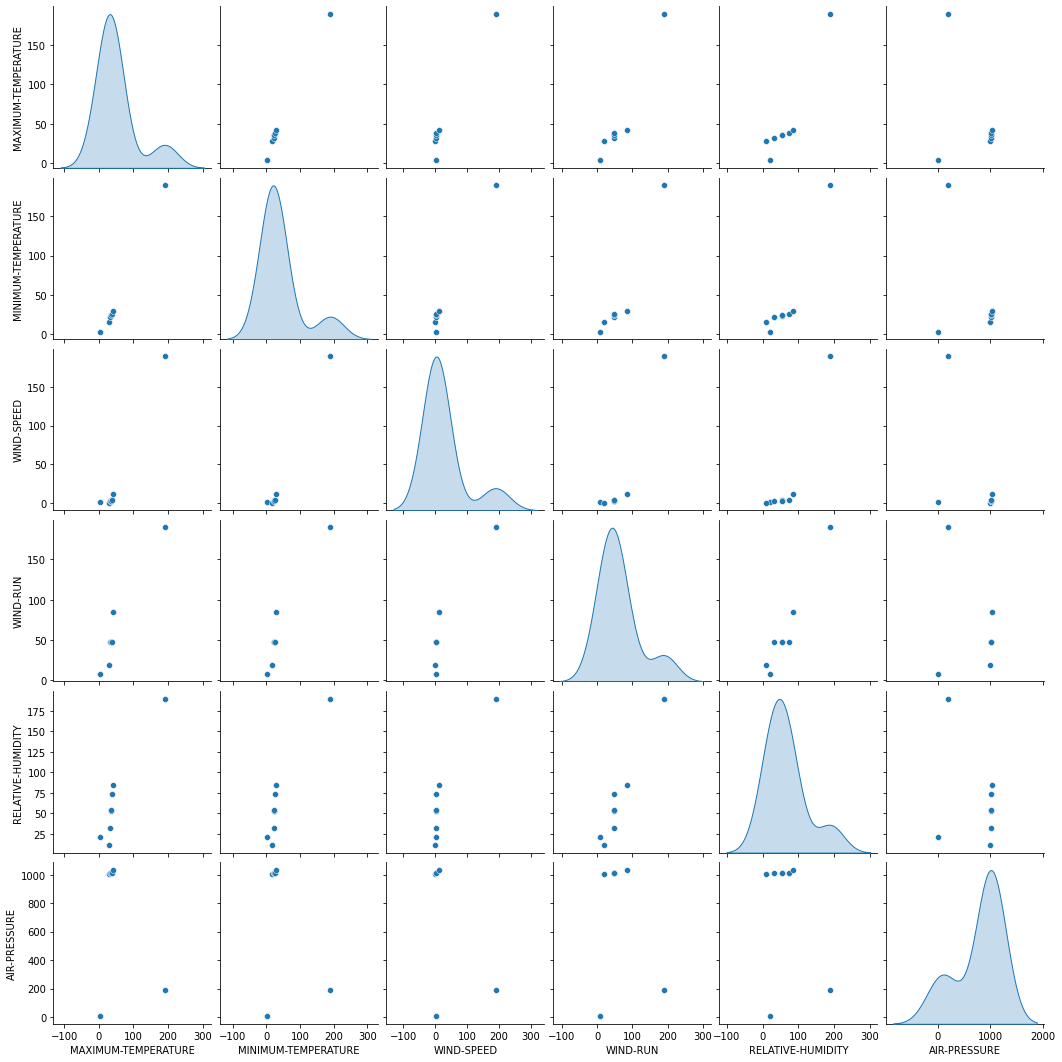

In [21]:

train_stats = train_dataset.describe()
train_stats.pop("WIND-DIRECTION")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

### Statistics on the train dataset to make sure it in a good shape

In [22]:

train_stats = train_dataset.describe()
wind_direction=train_stats.pop("WIND-DIRECTION")
train_stats = train_stats.transpose()
#train_stats
wind_direction

count    190.000000
mean     165.736842
std       55.074593
min       58.000000
25%      120.000000
50%      170.000000
75%      203.000000
max      307.000000
Name: WIND-DIRECTION, dtype: float64

## The label is "WIND-DIRECTION"

In [23]:
train_labels = train_dataset.pop('WIND-DIRECTION')
test_labels = test_dataset.pop('WIND-DIRECTION')
valid_labels = valid_dataset.pop('WIND-DIRECTION')

## Data Normalization/Scaling

## Subtract the mean of the training data and divide by the standard deviation

### define a function to normalize the data set.

In [24]:


from sklearn.preprocessing import MinMaxScaler

def norm(x):
    cols_to_scale= ['MAXIMUM-TEMPERATURE','MINIMUM-TEMPERATURE','WIND-SPEED','RELATIVE-HUMIDITY','WIND-RUN','AIR-PRESSURE']
    scaler = MinMaxScaler()
    x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])
    return x
      #return (x - train_stats['mean'] / train_stats['std'])
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [25]:
print(f'Train/Test/Validate splits: ')
print(f'Train       : {normed_train_data.shape} ')
print(f'Test        : {normed_test_data.shape} ')
print(f'Validate    : {normed_valid_dataset.shape} ')

print(f'Train/Test/Validate labels: ')
print(f'Train Labels : {train_labels.shape}')
print(f'Test Labels  : {test_labels.shape}')
print(f'Test Labels  : {valid_labels.shape}')

Train/Test/Validate splits: 
Train       : (190, 6) 
Test        : (64, 6) 
Validate    : (64, 6) 
Train/Test/Validate labels: 
Train Labels : (190,)
Test Labels  : (64,)
Test Labels  : (64,)


## show a sample of the data after normalized

In [26]:

normed_train_data.head(10)

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
252,0.365672,0.130769,0.158333,0.433384,0.191781,0.092537
14,0.873134,0.769231,0.333333,0.439510,0.328767,0.217910
128,0.208955,0.584615,0.166667,0.439510,0.958904,0.361194
49,0.746269,0.515385,0.250000,0.439510,0.246575,0.253731
11,0.522388,0.000000,0.250000,0.439510,0.315068,0.459701
220,0.552239,0.523077,0.500000,0.439510,0.643836,0.298507
5,0.320896,0.600000,0.166667,0.439510,0.890411,0.277612
160,0.589552,0.838462,0.250000,0.439510,0.479452,0.292537
314,0.835821,0.776923,0.175000,0.839204,0.328767,0.092537
221,0.455224,0.746154,0.333333,0.439510,0.767123,0.346269


## Build a Neural Network Model

### We declared a function for creating a model.

In [27]:


def model1_single_layer_perceptron():
    model = keras.Sequential([
       keras.layers.Dense(1,input_shape=(6,)) 
    ])
    model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae','mse','mape'])
    
    return model
    
        

In [28]:
model1 = model1_single_layer_perceptron()
print('Here is a summary of this model: ')
model1.summary()

Here is a summary of this model: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


## import NN and other components.

In [29]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,BatchNormalization,Dropout
from tensorflow.keras import optimizers

In [30]:
def model2_multilayer_perceptron_with_one_hidden_layer():
      model = Sequential()
     # The model so far is empty. It can be constructed by adding layers and compilation.
     # This Keras model with a single hidden layers.
        
     # Input Layer with 10 Neurons
      model.add(Dense(10, input_shape =(normed_train_data.shape[1],)))
 
      model.add(Dense(35, Activation('relu'))) # Hidden layer 1

      model.add(Dense(1))  # Output layer => output dimension = 1
    
      learning_rate = 0.001
    
      optimizer = optimizers.RMSprop(learning_rate)
  
      model.compile(loss='mse',optimizer=optimizer, metrics=['mae','mse','mape']) 
      return model


In [31]:
model2 = model2_multilayer_perceptron_with_one_hidden_layer()
print('Here is a summary of this model: ')
model2.summary()

Here is a summary of this model: 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_2 (Dense)              (None, 35)                385       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 36        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [32]:
def model3_multilayer_perceptron_with_two_hidden_layer():
      model = Sequential()
     # The model so far is empty. It can be constructed by adding layers and compilation.
     # This Keras model with a single hidden layers.
        
     # Input Layer with 32 Neurons
      model.add(Dense(32, input_shape =(normed_train_data.shape[1],)))
 
      model.add(Dense(32, Activation('relu'))) # Hidden layer 1
    
      model.add(Dense(64, Activation('relu'))) # Hidden layer 2
    
      model.add(Dense(72, Activation('relu'))) # Hidden layer 2
    
      model.add(Dense(1,Activation('linear')))  # Output layer => output dimension = 1
    
      learning_rate = 0.001
    
      optimizer = optimizers.RMSprop(learning_rate)
  
      model.compile(loss='mse',optimizer=optimizer, metrics=['mae','mse','mape']) 
      return model

In [33]:
model3 = model3_multilayer_perceptron_with_two_hidden_layer()
print('Here is a summary of this model: ')


model3.summary()


Here is a summary of this model: 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                224       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 72)                4680      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 73        
Total params: 8,145
Trainable params: 8,145
Non-trainable params: 0
_________________________________________________________________


## Test the model before training (this will use the initial weights)

In [34]:

example_result_1 = model1.predict(normed_train_data) # Here we are using the single layer perceptron model



## Compare the predicted values with the actual values 

In [35]:
print('Predicted Values')
print(example_result_1[:10])
print()
print('Actual Values')
print(train_labels[:10].to_string(index=False))

Predicted Values
[[0.7459593 ]
 [1.620928  ]
 [0.95758235]
 [1.3322071 ]
 [0.9018034 ]
 [1.3664367 ]
 [1.0368102 ]
 [1.4113934 ]
 [1.7424688 ]
 [1.3276386 ]]

Actual Values
160
181
133
173
 90
170
110
252
220
188


## Save checkpoints during training

In [36]:
# checkpoint_path
checkpoint_path = r".\models\wind_direction_prediction.ckpt"

#create a callback that saves the model's weight
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',
                                                 save_best_only=True,verbose=0,)

## Training the model we built above.

### Training the single layer perceptron

In [37]:
# Tensorflow utils packages.
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [38]:
%%time

EPOCHS = 500
batch_size = 6

model1 = model1_single_layer_perceptron()
print('Here is a summary of this model: ')
model1.summary()

with tf.device('/CPU:0'):
    history = model1.fit(
        normed_train_data,
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        shuffle=True,
        steps_per_epoch= 1,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), ckpt_callback],
    )


Here is a summary of this model: 
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:28907.2129,  mae:157.7988,  mape:99.0354,  mse:28907.2129,  val_loss:25095.5234,  val_mae:148.8013,  val_mape:99.1085,  val_mse:25095.5234,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wi

.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets

Epoch: 100, loss:19404.9043,  mae:135.8590,  mape:98.8984,  mse:19404.9043,  val_loss:24981.7285,  val_mae:148.4243,  val_mape:98.8260,  val_mse:24981.7285,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tens

.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets

Epo

.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INF

.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INF

.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets
.INF

In [39]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
495,19760.724609,136.390182,19760.724609,97.825867,24540.638672,146.953766,24540.638672,97.723701,495
496,31098.283203,162.076553,31098.283203,98.134918,24539.544922,146.950089,24539.544922,97.720947,496
497,30845.802734,168.111130,30845.802734,98.048256,24538.441406,146.946396,24538.441406,97.718185,497
498,37560.792969,180.970444,37560.792969,98.178497,24537.320312,146.942627,24537.320312,97.715370,498
499,33403.847656,177.973145,33403.847656,98.287697,24536.187500,146.938843,24536.187500,97.712509,499


In [40]:
# Test the model after training
example_result_2 = model1.predict(normed_test_data)

## Compare the predicted values with the actual values

In [41]:
print('Predicted Values')
print(example_result_2[:10])
print()
print('Actual Values')
print(test_labels[:10].to_string(index=False))

Predicted Values
[[3.8096871]
 [4.3260603]
 [3.7269425]
 [3.081293 ]
 [3.487017 ]
 [3.8065438]
 [3.1101096]
 [3.6751046]
 [3.8082116]
 [4.238099 ]]

Actual Values
113
182
223
156
230
169
125
165
213
178


In [42]:
print('The ground truth: ')
train_labels[:10]

The ground truth: 


252    160
14     181
128    133
49     173
11      90
220    170
5      110
160    252
314    220
221    188
Name: WIND-DIRECTION, dtype: int64

## See how the training went by plotting the loss/mse across epochs

Text(0, 0.5, 'MAE [wind-speed]')

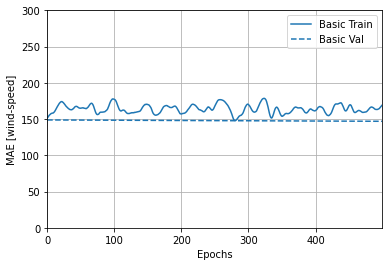

In [43]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = 'mae')
plt.ylim([0,300])
plt.ylabel('MAE [wind-speed]')

Text(0, 0.5, 'MSE [wind-speed]')

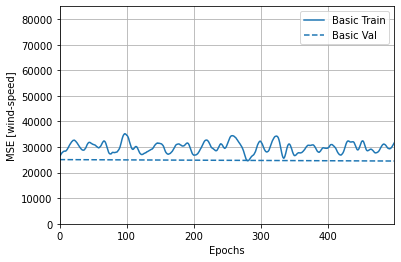

In [44]:
plotter.plot({'Basic': history}, metric = 'mse')
plt.ylim([0,85000])
plt.ylabel('MSE [wind-speed]')

In [45]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model1.evaluate(normed_train_data, train_labels, verbose=2)

print('Train set Mean Abs Error : {:5.2f}'.format(mae))
print('Train set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Train Split: 
6/6 - 0s - loss: 29503.3789 - mae: 162.8366 - mse: 29503.3789 - mape: 98.0711
Train set Mean Abs Error : 162.84
Train set Mean Square Error : 29503.38


In [46]:
print('Error Rate on Evaluation  Split: ')
loss, mae, mse, mape = model1.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print('Validation set Mean Abs Error : {:5.2f}'.format(mae))
print('Validation set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Evaluation  Split: 
2/2 - 0s - loss: 24536.1875 - mae: 146.9388 - mse: 24536.1875 - mape: 97.7125
Validation set Mean Abs Error : 146.94
Validation set Mean Square Error : 24536.19


In [47]:
print('Error Rate on Test  Split: ')
loss, mae, mse, mape = model1.evaluate(normed_test_data, test_labels, verbose=2)

print('Testing set Mean Abs Error : {:5.2f}'.format(mae))
print('Testing set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Test  Split: 
2/2 - 0s - loss: 33736.5469 - mae: 177.7065 - mse: 33736.5469 - mape: 98.0110
Testing set Mean Abs Error : 177.71
Testing set Mean Square Error : 33736.55


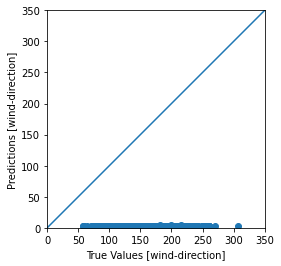

In [48]:
train_predictions = model1.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [wind-direction]')
plt.ylabel('Predictions [wind-direction]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

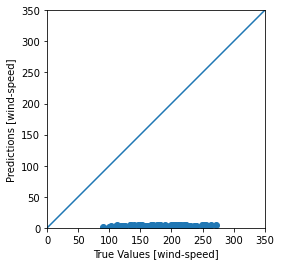

In [49]:
test_predictions = model1.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

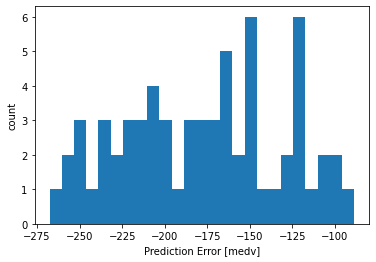

In [50]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [medv]")
_ = plt.ylabel("count")

## One hidden layer analysis

In [51]:
# checkpoint_path
checkpoint_path = r".\models\wind_direction_prediction2.ckpt"

#create a callback that saves the model's weight
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',
                                                 save_best_only=True,verbose=0,)

In [52]:
%%time

EPOCHS = 500
batch_size = 6

model2 = model2_multilayer_perceptron_with_one_hidden_layer()
print('Here is a summary of this model: ')
model2.summary()

with tf.device('/CPU:0'):
    history = model2.fit(
        normed_train_data,
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        shuffle=True,
        steps_per_epoch= 1,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), ckpt_callback],
    )


Here is a summary of this model: 
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                70        
_________________________________________________________________
dense_11 (Dense)             (None, 35)                385       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 36        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:22535.3184,  mae:143.0331,  mape:100.0302,  mse:22535.3184,  val_loss:25522.5527,  val_mae:150.2189,  val_mape:100.1754,  val_mse:25522.5527,  
.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets



Epoch: 100, loss:33584.2539,  mae:180.9370,  mape:97.5762,  mse:33584.2539,  val_loss:24175.3848,  val_mae:145.7050,  val_mape:96.7654,  val_mse:24175.3848,  
.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets



Epoch: 200, loss:18361.7031,  mae:116.0218,  mape:86.1607,  mse:18361.7031,  val_loss:21457.4492,  val_mae:136.2003,  val_mape:89.6286,  val_mse:21457.4492,  
.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets



Epoch: 300, loss:31320.3340,  mae:172.4846,  mape:84.6535,  mse:31320.3340,  val_loss:16868.1641,  val_mae:118.4402,  val_mape:76.3119,  val_mse:16868.1641,  
.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets



Epoch: 400, loss:20315.7207,  mae:138.1157,  mape:69.1722,  mse:20315.7207,  val_loss:10951.1094,  val_mae:90.4872,  val_mape:55.3555,  val_mse:10951.1084,  
.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


Wall time: 11min 7s


In [53]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
495,4949.654785,50.619812,4949.654785,27.968363,5540.838379,57.210861,5540.838379,32.632698,495
496,7278.514160,70.904427,7278.514160,38.765781,5491.390625,56.916122,5491.390625,32.489311,496
497,7678.148926,69.302109,7678.148926,37.600826,5449.141113,56.669323,5449.141113,32.372494,497
498,10138.379883,80.567589,10138.379883,38.637188,5394.811523,56.357365,5394.811523,32.228867,498
499,6209.332031,67.988243,6209.332031,37.132946,5347.348633,56.081722,5347.348633,32.101215,499


In [54]:
# Test the model after training
example_result_3 = model2.predict(normed_test_data)

## Compare the predicted values with the actual values

In [55]:
print('Predicted Values')
print(example_result_3[:10])
print()
print('Actual Values')
print(test_labels[:10].to_string(index=False))

Predicted Values
[[114.77927 ]
 [126.41099 ]
 [114.54799 ]
 [ 97.323685]
 [107.974556]
 [115.59343 ]
 [ 94.58695 ]
 [113.07998 ]
 [114.99118 ]
 [125.50755 ]]

Actual Values
113
182
223
156
230
169
125
165
213
178


In [56]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
495,4949.654785,50.619812,4949.654785,27.968363,5540.838379,57.210861,5540.838379,32.632698,495
496,7278.514160,70.904427,7278.514160,38.765781,5491.390625,56.916122,5491.390625,32.489311,496
497,7678.148926,69.302109,7678.148926,37.600826,5449.141113,56.669323,5449.141113,32.372494,497
498,10138.379883,80.567589,10138.379883,38.637188,5394.811523,56.357365,5394.811523,32.228867,498
499,6209.332031,67.988243,6209.332031,37.132946,5347.348633,56.081722,5347.348633,32.101215,499


## See how the training went by plotting the loss/mse across epochs

Text(0, 0.5, 'MAE [wind-direction]')

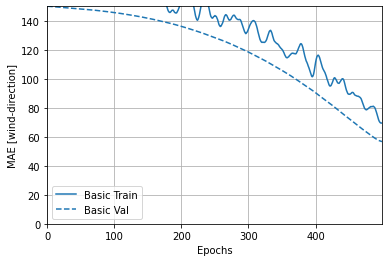

In [57]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = 'mae')
plt.ylim([0,150])
plt.ylabel('MAE [wind-direction]')

Text(0, 0.5, 'MSE [wind-direction]')

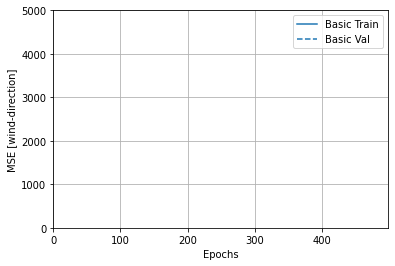

In [58]:
plotter.plot({'Basic': history}, metric = 'mse')
plt.ylim([0,5000])
plt.ylabel('MSE [wind-direction]')

In [59]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model2.evaluate(normed_train_data, train_labels, verbose=2)

print('Train set Mean Abs Error : {:5.2f}'.format(mae))
print('Train set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Train Split: 
6/6 - 0s - loss: 7394.9448 - mae: 72.6347 - mse: 7394.9448 - mape: 39.3874
Train set Mean Abs Error : 72.63
Train set Mean Square Error : 7394.94


In [60]:
print('Error Rate on Evaluation  Split: ')
loss, mae, mse, mape = model2.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print('Validation set Mean Abs Error : {:5.2f}'.format(mae))
print('Validation set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Evaluation  Split: 
2/2 - 0s - loss: 5347.3486 - mae: 56.0817 - mse: 5347.3486 - mape: 32.1012
Validation set Mean Abs Error : 56.08
Validation set Mean Square Error : 5347.35


In [61]:
print('Error Rate on Test  Split: ')
loss, mae, mse, mape = model2.evaluate(normed_test_data, test_labels, verbose=2)

print('Testing set Mean Abs Error : {:5.2f}'.format(mae))
print('Testing set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Test  Split: 
2/2 - 0s - loss: 7126.3428 - mae: 73.6872 - mse: 7126.3428 - mape: 37.8996
Testing set Mean Abs Error : 73.69
Testing set Mean Square Error : 7126.34


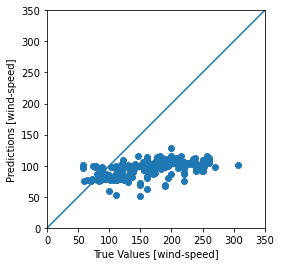

In [62]:
train_predictions = model2.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

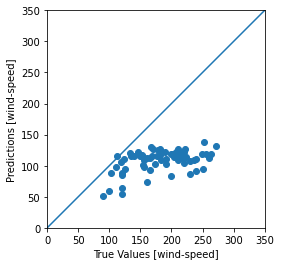

In [63]:
test_predictions = model2.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

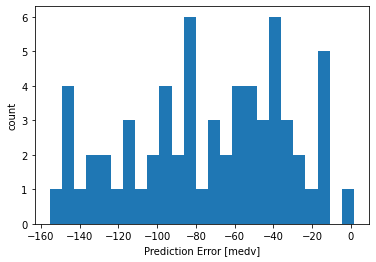

In [64]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [medv]")
_ = plt.ylabel("count")

## Two hidden layer analysis

In [65]:
# checkpoint_path
checkpoint_path = r".\models\wind_direction_prediction3.ckpt"

#create a callback that saves the model's weight
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',
                                                 save_best_only=True,verbose=0,)

In [66]:
%%time

EPOCHS = 500
batch_size = 6

model3 = model3_multilayer_perceptron_with_two_hidden_layer()
print('Here is a summary of this model: ')
model3.summary()

with tf.device('/CPU:0'):
    history = model3.fit(
        normed_train_data,
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        shuffle=True,
        steps_per_epoch= 1,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), ckpt_callback],
    )


Here is a summary of this model: 
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 32)                224       
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_16 (Dense)             (None, 72)                4680      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 73        
Total params: 8,145
Trainable params: 8,145
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:21405.0801,  mae:141.7984,  mape:99.9712,  mse:21405.0801,  val_loss

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


................
Epoch: 100, loss:2108.7361,  mae:40.2192,  mape:30.8344,  mse:2108.7361,  val_loss:3171.6709,  val_mae:47.8361,  val_mape:40.1345,  val_mse:3171.6709,  
................................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.................................................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...................
Epoch: 200, loss:1905.8350,  mae:35.4814,  mape:19.4531,  mse:1905.8350,  val_loss:3484.0518,  val_mae:50.0867,  val_mape:43.0551,  val_mse:3484.0518,  
...........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...........................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...............

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


................
Epoch: 300, loss:3087.7109,  mae:48.8582,  mape:35.7905,  mse:3087.7109,  val_loss:2518.1289,  val_mae:42.1385,  val_mape:34.4353,  val_mse:2518.1289,  
.....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.............

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.........................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.....................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets



Epoch: 400, loss:617.4479,  mae:20.7208,  mape:14.8988,  mse:617.4479,  val_loss:2172.4478,  val_mae:37.8579,  val_mape:28.3443,  val_mse:2172.4478,  
..........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.............

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...Wall time: 4min 4s


In [67]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
495,1497.686646,29.496698,1497.686646,29.557434,2093.361084,37.423100,2093.361084,28.558891,495
496,3927.672119,55.648922,3927.672119,46.048969,2086.622559,37.093479,2086.622559,27.827162,496
497,1871.662720,35.906700,1871.662720,24.869867,2087.831787,36.976891,2087.831787,27.561148,497
498,2341.344727,41.154572,2341.344727,40.755524,2106.299805,36.713840,2106.299805,26.706821,498
499,564.427307,20.127430,564.427307,12.572720,2092.241943,36.823868,2092.241943,27.104876,499


In [68]:
# Test the model after training
example_result_4 = model3.predict(normed_test_data)


## Compare the Actual Values with the predicted values

In [69]:
print('Predicted Values')
print(example_result_4[:10])
print()
print('Actual Values')
print(train_labels[:10].to_string(index=False))

Predicted Values
[[168.70692]
 [200.14427]
 [177.83922]
 [126.23998]
 [178.22911]
 [170.48317]
 [133.58675]
 [170.81184]
 [165.46309]
 [185.26978]]

Actual Values
160
181
133
173
 90
170
110
252
220
188


## See how the training went by plotting the loss/mse across epochs

Text(0, 0.5, 'MAE [wind-direction]')

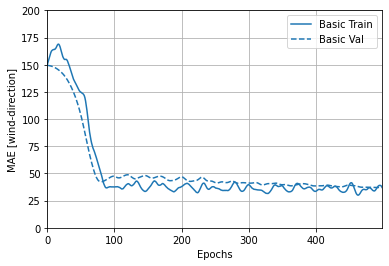

In [70]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = 'mae')
plt.ylim([0,200])
plt.ylabel('MAE [wind-direction]')

Text(0, 0.5, 'MSE [wind-direction]')

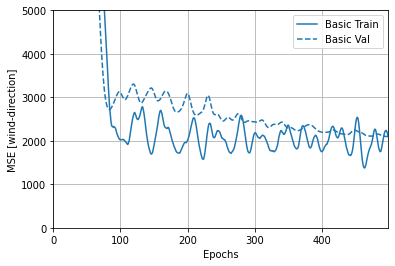

In [71]:
plotter.plot({'Basic': history}, metric = 'mse')
plt.ylim([0,5000])
plt.ylabel('MSE [wind-direction]')

In [72]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model3.evaluate(normed_train_data, train_labels, verbose=2)

print('Train set Mean Abs Error : {:5.2f}'.format(mae))
print('Train set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Train Split: 
6/6 - 0s - loss: 1905.3850 - mae: 34.7000 - mse: 1905.3850 - mape: 24.3875
Train set Mean Abs Error : 34.70
Train set Mean Square Error : 1905.39


In [73]:
print('Error Rate on Evaluation  Split: ')
loss, mae, mse, mape = model3.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print('Validation set Mean Abs Error : {:5.2f}'.format(mae))
print('Validation set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Evaluation  Split: 
2/2 - 0s - loss: 2092.2419 - mae: 36.8239 - mse: 2092.2419 - mape: 27.1049
Validation set Mean Abs Error : 36.82
Validation set Mean Square Error : 2092.24


In [74]:
print('Error Rate on Test  Split: ')
loss, mae, mse, mape = model3.evaluate(normed_test_data, test_labels, verbose=2)

print('Testing set Mean Abs Error : {:5.2f}'.format(mae))
print('Testing set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Test  Split: 
2/2 - 0s - loss: 1864.8728 - mae: 35.0595 - mse: 1864.8728 - mape: 18.5076
Testing set Mean Abs Error : 35.06
Testing set Mean Square Error : 1864.87


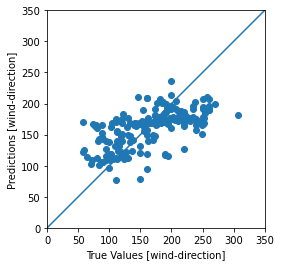

In [75]:
train_predictions = model3.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [wind-direction]')
plt.ylabel('Predictions [wind-direction]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

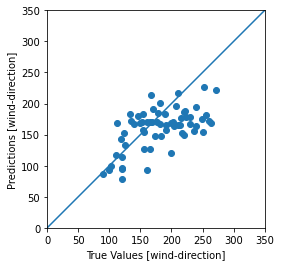

In [76]:
test_predictions = model3.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [wind-direction]')
plt.ylabel('Predictions [wind-direction]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

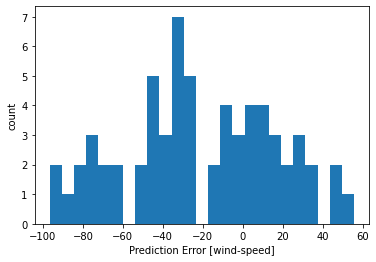

In [77]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [wind-speed]")
_ = plt.ylabel("count")